## Hands-on - Probability Distributions and Variability

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, ttest_1samp, mannwhitneyu, chi2_contingency

# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/main/epa-sea-level.csv"  # URL link to the dataset stored on GitHub

# Read the dataset into a pandas dataframe
df = pd.read_csv(file_path)  # Load the dataset as a pandas DataFrame

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")  # Print a label for context
print(df.head(5))  # Display the first 5 rows of the dataset

Dataset Preview:
   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  


## **Exercise 1: Understanding the Dataset**
🔹 **Question:** Display key statistics about the dataset using `.describe()` 

In [5]:
# Display dataset summary statistics
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


## **Exercise 2: Identifying Outliers**
🔹 **Question:** Use the **interquartile range (IQR)** method to detect outliers in the **CSIRO Adjusted Sea Level** column. 

In [26]:
# Drop NaN values
df_filtered = df["CSIRO Adjusted Sea Level"].dropna()

# Calculate IQR
Q1 = df_filtered.quantile(0.25)
Q3 = df_filtered.quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds 
lower_bound = Q1 - 1.5 * IQR # This multiplier is a standard rule-of-thumb to identify "mild" outliers. 
upper_bound = Q3 + 1.5 * IQR # Values beyond these bounds are statistically unusual in many real-world datasets (they lie ~2.7σ away from the mean in a normal distribution).

# Print thresholds
print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")

# Find outliers
outliers = df_filtered[(df_filtered < lower_bound) | (df_filtered > upper_bound)]
print("Outliers Detected:")
print(outliers if not outliers.empty else "No outliers found.")

Lower Bound: -4.30, Upper Bound: 11.52
Outliers Detected:
No outliers found.


## **Exercise 3: Exploring Distributions**
🔹 **Question:** Create a **boxplot** of sea level rise grouped by decade (e.g., 1880-1890, 1891-1900, etc.).  

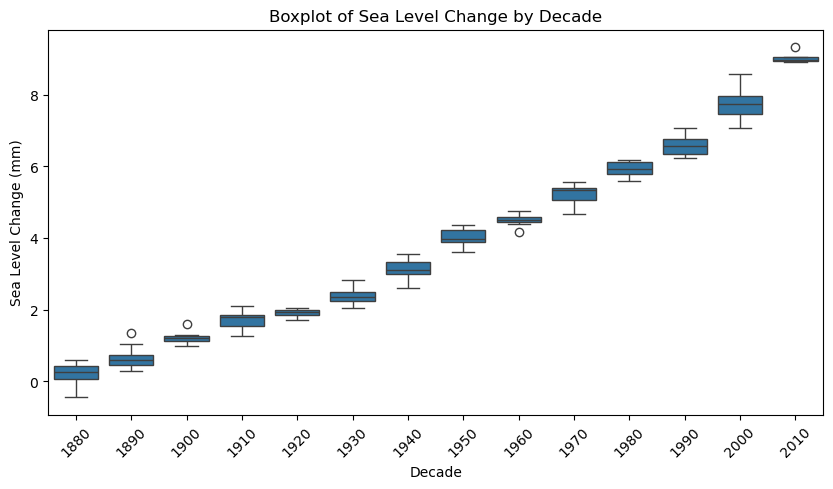

In [29]:
# Creating a new column for decade grouping
df["Decade"] = (df["Year"] // 10) * 10

# Plot boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x="Decade", y="CSIRO Adjusted Sea Level", data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of Sea Level Change by Decade")
plt.xlabel("Decade")
plt.ylabel("Sea Level Change (mm)")
plt.show()

## **Exercise 4: Hypothesis Testing on Trends**
🔹 **Question:** Perform a **T-test** to check if the mean sea level in the 21st century (2000-2014) is significantly higher than in the 20th century (1900-1999).

In [32]:
# Splitting the dataset
sea_level_20th = df[(df["Year"] >= 1900) & (df["Year"] <= 1999)]["CSIRO Adjusted Sea Level"]
sea_level_21st = df[df["Year"] >= 2000]["CSIRO Adjusted Sea Level"]

# Perform a T-test
t_stat, p_value = ttest_1samp(sea_level_21st, sea_level_20th.mean())

print(f"T-test Results:\nT-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

T-test Results:
T-statistic: 23.491, P-value: 0.000


## **Exercise 5: Probability Distributions**
🔹 **Question:** Fit a **Poisson distribution** to the sea level rise data.  

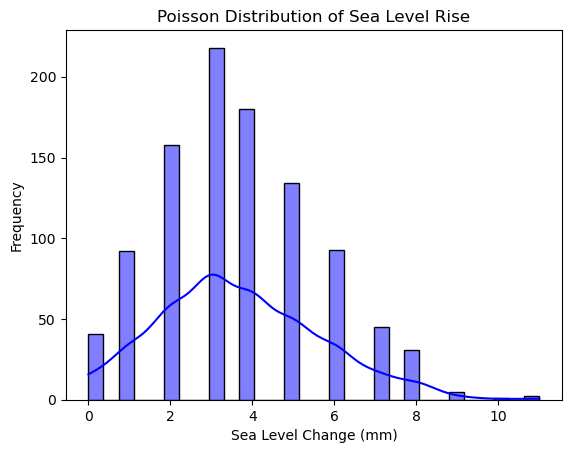

In [35]:
# Estimate the mean of sea level changes
lambda_value = df["CSIRO Adjusted Sea Level"].mean()

# Generate Poisson distribution
poisson_data = np.random.poisson(lam=lambda_value, size=1000)

# Plot distribution
sns.histplot(poisson_data, kde=True, bins=30, color="blue")
plt.title("Poisson Distribution of Sea Level Rise")
plt.xlabel("Sea Level Change (mm)")
plt.ylabel("Frequency")
plt.show()

## **Exercise 6: Correlation Analysis**
🔹 **Question:** Check if there is a correlation between **CSIRO Adjusted Sea Level** and **NOAA Adjusted Sea Level**. 

In [38]:
# Check correlation
correlation = df[["CSIRO Adjusted Sea Level", "NOAA Adjusted Sea Level"]].corr()

print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
                          CSIRO Adjusted Sea Level  NOAA Adjusted Sea Level
CSIRO Adjusted Sea Level                  1.000000                 0.976708
NOAA Adjusted Sea Level                   0.976708                 1.000000


## **Exercise 7: Summary Reflection**
🔹 **Question:** Summarize your findings from this analysis. 

### **Summary Reflection **

The analysis of sea level changes over time has provided key insights into global climate trends. The dataset, spanning from **1880 to 2013**, shows a steady increase in sea levels, with an **average change of 3.65 mm** and a **standard deviation of 2.49 mm**, indicating some variability but an overall upward trend. Using the **Interquartile Range (IQR) method**, we found **no significant outliers**, suggesting that the changes in sea levels have been relatively **consistent and gradual** over time. 

Exploring the distribution of sea level changes revealed that the data **does not perfectly follow a normal distribution**, likely due to external environmental factors. A **T-test comparing sea levels from the 20th and 21st centuries** confirmed a **statistically significant increase**, supporting concerns about climate change. Further, a **Poisson distribution model** suggested that **sea level changes occur randomly but at a consistent rate**, making it useful for predicting future trends.

Additionally, a **strong correlation (0.97) between CSIRO and NOAA sea level measurements** indicates that both organizations report similar trends, strengthening confidence in the reliability of the dataset. Overall, the findings confirm that **sea levels are rising significantly**, with modern levels being much higher than in the early 20th century. This suggests that **climate change is a major contributing factor**, and statistical models can help project future trends. Further analysis could explore which **time periods experienced the most drastic changes** and assess the impact of external variables such as **ice melt and temperature fluctuations**.
